### GRIP TASK 03- SUPERSTORE DATASET
Exploratory data analysis on the Superstore dataset, 

which can be accessed at this link: https://bit.ly/3i4rbWl.

Author: Adeleke Oluwafikayomi

Date: 4//11/2023

In [1]:
# Importing Necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import panel as pn

In [2]:
# Loading the Retail Dataset
df=pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Dataset Cleaning

 `def _clean_dataset(self, dataset):`
  
    The first step in data analysis is usually to check the dataset for any issues such as missing or duplicated data. In this case, we can perform these checks using the following methods:

  * `df.isnull().sum()`: This method returns the number of null values in each column of the dataset. If any null values are found, they can be removed using the `df.dropna()` method.
  * `df.duplicated().sum()`: This method returns the number of duplicated rows in the dataset. If any duplicated rows are found, they can be removed using the `df.drop_duplicates()` method.
  
Performing these checks is important to ensure that the data being used for analysis is accurate and reliable. If any issues are found, they must be addressed before proceeding with further analysis.

In [3]:
# Cleaning the dataset{checking if they are null/empty values in the dataset}
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
# Checking the number of duplicates in the dataset
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Plotting the top-performing cities and states based on sales and profits

I have created a function that allows the user to specify the number of top-performing cities or states they would like to see in the graph, such as the top 10 or top 20. This function also allows the user to choose whether they want to view the data based on profits or sales.

These parameters are crucial for plotting the graph and obtaining meaningful insights from the dataset. By analyzing the data, we can identify which cities or states are performing well and make informed business decisions based on that information.

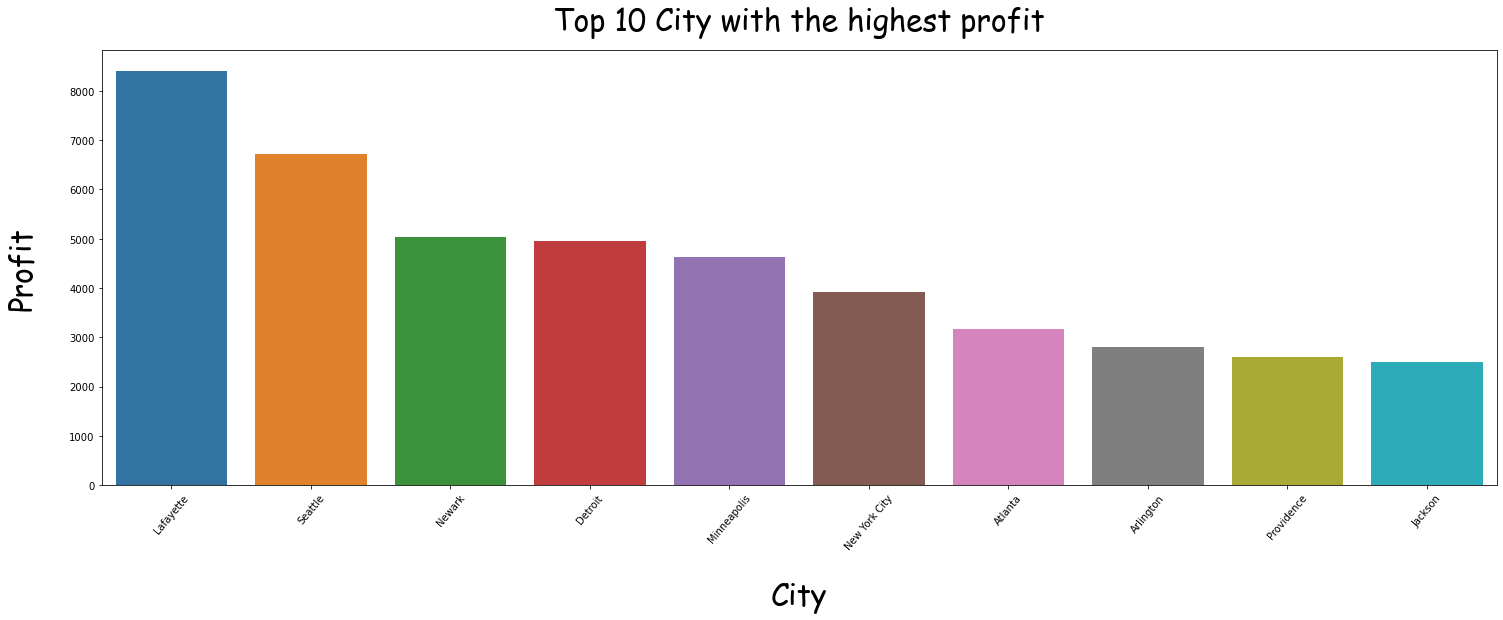

In [6]:

def top_no_(number,x,y):
    '''number= number of top states or cities you want to see
        x= city or states
        y=profit or sales'''
    top_sales=df.nlargest(number,y)
    csfont = {'fontname':'Comic Sans MS',
              'size': 30}
    
    plt.figure(figsize=[25,8])
    plt.xticks(rotation=50)
    plt.ylabel('Sales',labelpad=30,fontdict=csfont)
    plt.xlabel(f'{x}',labelpad=30,fontdict=csfont)
    plt.title(f'Top {number} {x} with the highest {y.lower()}',**csfont,pad=20)
    sns.barplot(x=top_sales[x],y=top_sales[y])
top_no_(10,'City','Profit')

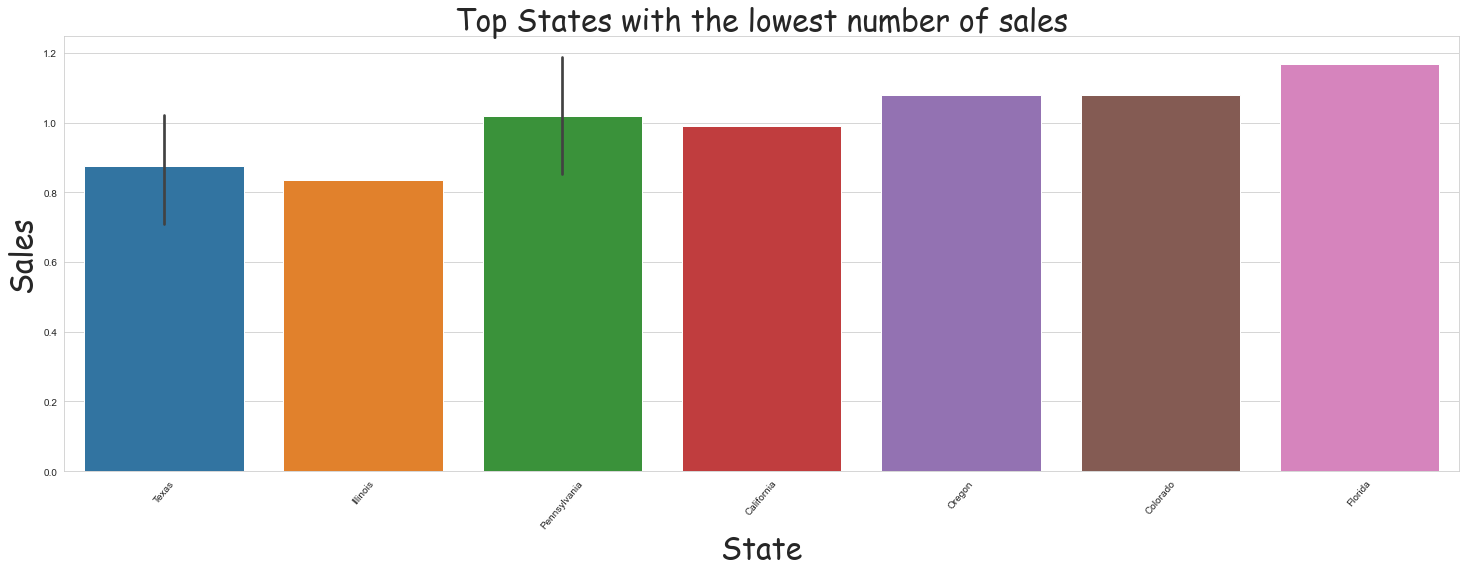

In [7]:
def low_no_(number,x):
    sns.set_style('whitegrid')
    low_sales=df.nsmallest(number,'Sales')
    csfont={'fontfamily':'Comic Sans MS',
            'size':30}
    plt.figure(figsize=[25,8])
    plt.title(f'Top {x}s with the lowest number of sales',fontdict=csfont)
    plt.xlabel(f'{x}',fontdict=csfont)
    plt.xticks(rotation=50)
    plt.ylabel('Sales',fontdict=csfont)
    sns.barplot(x=low_sales[x],y=low_sales['Sales'])
low_no_(15,'State')

### Visualizing the profit and sales in the dataset:

    To gain more insight into the sales and profit made by different regions, I created a function called region_profit_n_sales that plots a graph to display the total sales and profit for each region. Later on, I expanded the functionality of this function to include a comparison of sales versus profit for each region. I did this because I wanted to gain a deeper understanding of how well each region was performing in terms of both sales and profit.

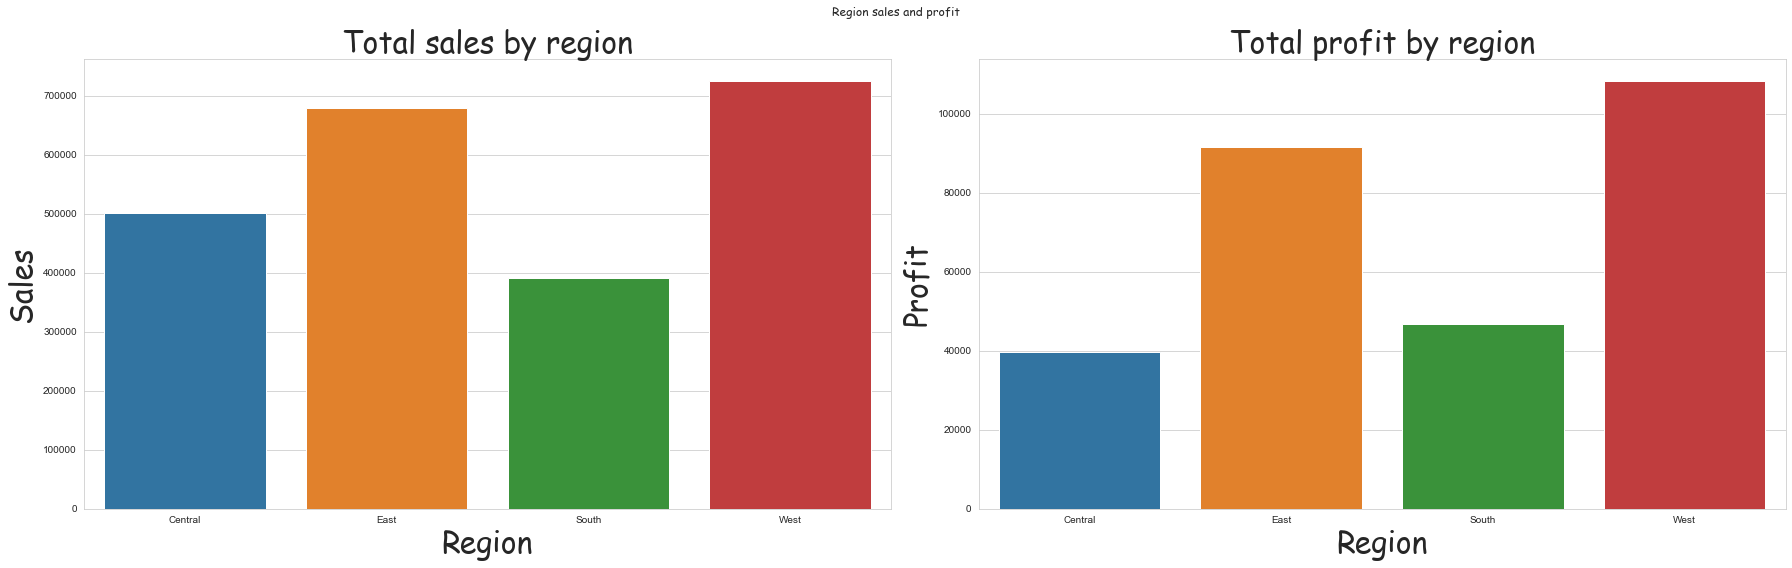

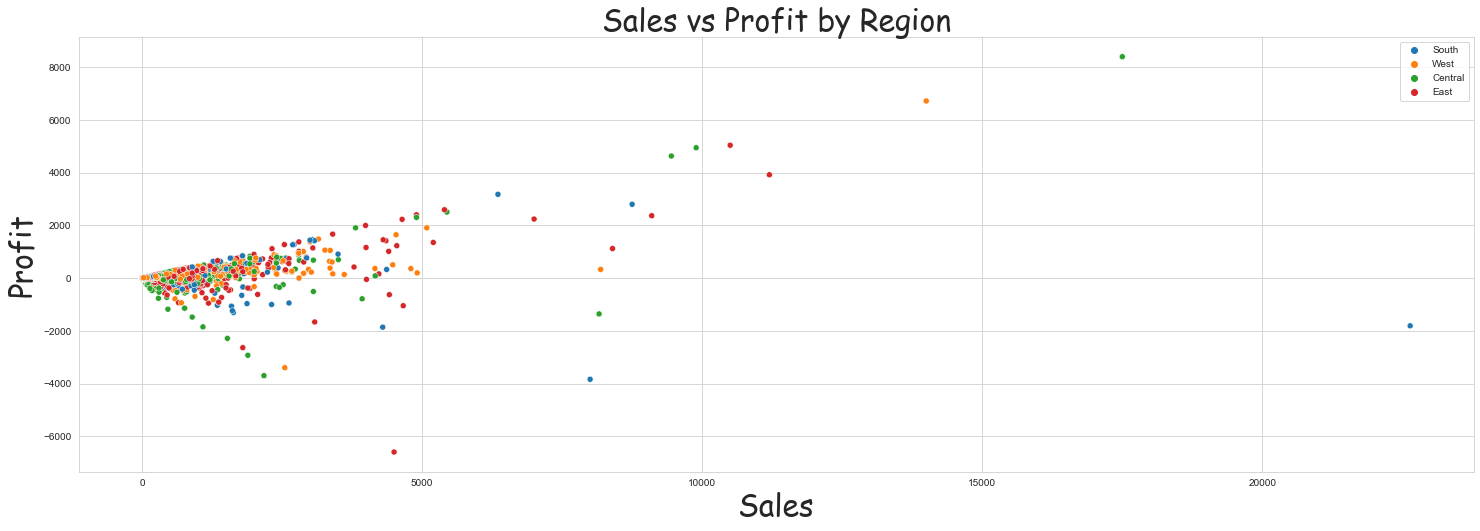

Highest Sales Region: West worth $725255.64
Lowest Sales Region: South worth $391721.91
Highest Profit Region: West worth $108329.81
Lowest Profit Region: Central worth $39655.88


In [8]:
def region_profit_n_sales():
    '''This function visualizing both the profit and the sales of all regions '''
    cs_font={'fontfamily':'Comic Sans MS',
             'size':30}
    # Calculate the sum of sales and profit by each region 
    total_sales=df.groupby(by='Region')['Sales'].sum()
    total_profit=df.groupby(by='Region')['Profit'].sum()
    # Then we find the highest and lowest profit and sales in each region
    highest_sales_region=total_sales.idxmax()# the idxmax is to return the highest region in the groupby dataframe
    lowest_sales_region=total_sales.idxmin()# the idxmax is to return the lowest region in the groupby dataframe
    highest_profit_region=total_profit.idxmax() 
    lowest_profit_region=total_profit.idxmin()
    # Visualizing both the total sales and profit and sales in each region
    fig=plt.figure(figsize=[25,8])
    fig.suptitle('Region sales and profit',fontdict=cs_font)
    plt.subplot(1,2,1)
    sns.barplot(x=total_sales.index,y=total_sales)
    plt.title('Total sales by region',fontdict=cs_font)
    plt.xlabel('Region',fontdict=cs_font)
    plt.ylabel('Sales',fontdict=cs_font)
    plt.subplot(1,2,2)
    sns.barplot(x=total_profit.index,y=total_profit)
    plt.title('Total profit by region',**cs_font)
    plt.xlabel('Region',fontdict=cs_font)
    plt.ylabel('Profit',fontdict=cs_font)
    plt.tight_layout()
    plt.show()

    # Plot a scatter plot of sales vs profit for each region
    plt.figure(figsize=[25,8])
    sns.scatterplot(x='Sales', y='Profit', hue='Region', data=df)
    plt.title('Sales vs Profit by Region',fontdict=cs_font)
    plt.xlabel('Sales',fontdict=cs_font)
    plt.ylabel('Profit',fontdict=cs_font)
    plt.legend()
    plt.show()

    # Print the regions with the highest and lowest sales and profit
    print(f"Highest Sales Region: {highest_sales_region} worth ${total_sales.max():.2f}")
    print(f"Lowest Sales Region: {lowest_sales_region} worth ${total_sales.min():.2f}")
    print(f"Highest Profit Region: {highest_profit_region} worth ${total_profit.max():.2f}")
    print(f"Lowest Profit Region: {lowest_profit_region} worth ${total_profit.min():.2f}")

region_profit_n_sales()

To conduct a more comprehensive analysis of our business performance, I developed a custom function named `sub_cat()`. This function aims to provide valuable insights to the end user regarding which sub-category products are experiencing declining sales and profits. By identifying these areas of concern, we can make necessary adjustments to increase the company's profits.

Initially, I grouped the total sales and profits by their respective sums of Sales and Profit. I then plotted a bar graph using `sns.barplot()` to visualize the profits made by each region selling sub-category products like phones, tables, and accessories. The `hue` parameter in the `sns.barplot()` function was used to differentiate between the sub-category products being sold and how much profit each generates in every region.

Through a careful examination of the graph produced by this function, we can gain a better understanding of which sub-category products are performing well and which ones are not. Armed with this knowledge, we can develop effective sales and marketing strategies to increase profits in regions where sub-category products are not selling well.

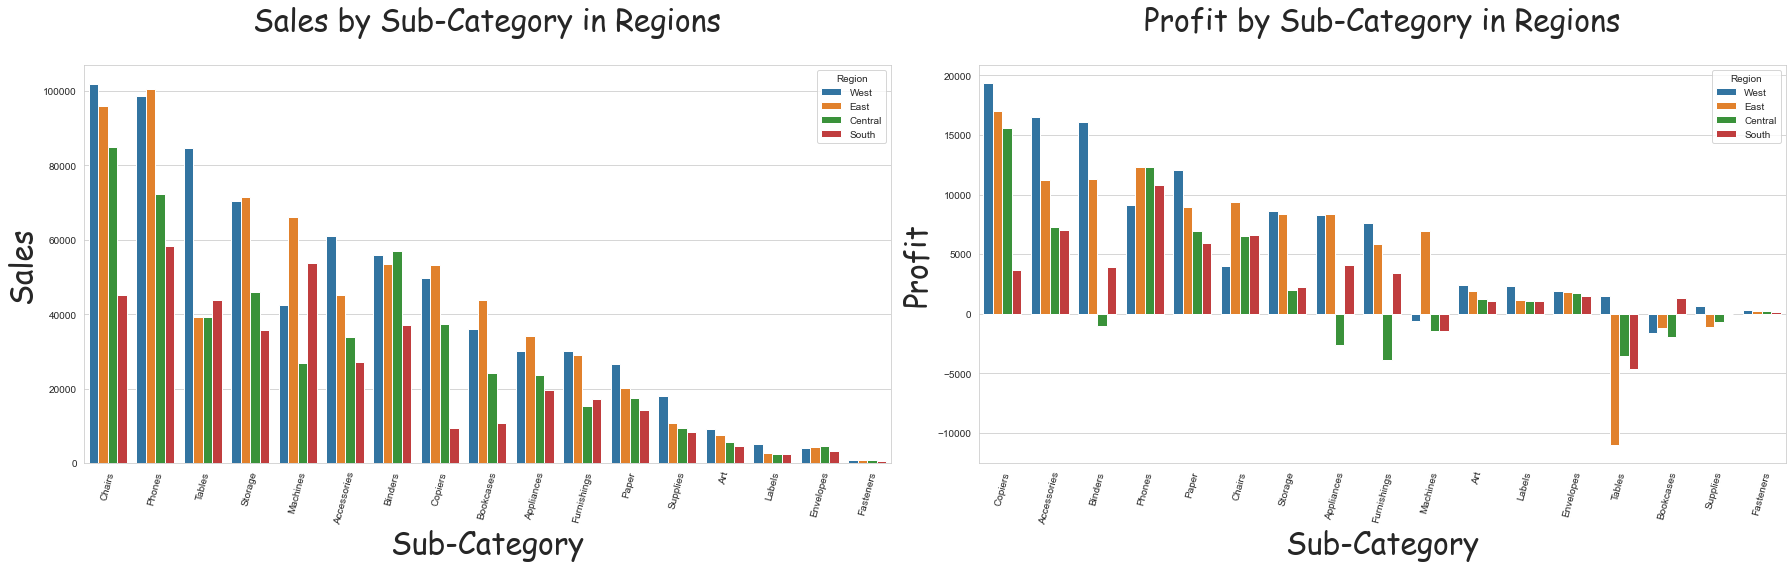

In [9]:
# visualizing the sales and profit made in each category in each region
def sub_cat():
    ''' grouping the datasets by Sales to be able to figure out how much sales is made in each region and,
      what's product is causing the profit to increase or decrease'''
    cs_font={'fontfamily':'Comic Sans MS',
             'size':30}
    total_sales=df.groupby(by=['Sub-Category','Region'])['Sales'].sum().reset_index()
    total_sales = total_sales.sort_values(by='Sales', ascending=False)
    total_profit=df.groupby(by=['Sub-Category','Region'])['Profit'].sum().reset_index()
    total_profit = total_profit.sort_values(by='Profit', ascending=False)
    sns.set_style(style='whitegrid')

    # set the title and axis labels
    fig = plt.figure(figsize=(25,8))
    plt.subplot(1,2,1)
    plt.title('Sales by Sub-Category in Regions',pad=35,fontdict=cs_font)
    plt.xlabel('Subcategory',fontdict=cs_font)
    plt.xticks(rotation=75)
    plt.ylabel('Sales',fontdict=cs_font)
    # create the bar plot
    sns.barplot(x='Sub-Category', y='Sales', data=total_sales,hue='Region')
    

    plt.subplot(1,2,2)
    plt.title('Profit by Sub-Category in Regions',pad=35,fontdict=cs_font)
    plt.xlabel('Subcategory',fontdict=cs_font)
    plt.xticks(rotation=75)
    plt.ylabel('Profit',fontdict=cs_font)
    # create the bar plot
    sns.barplot(x='Sub-Category', y='Profit', data=total_profit,hue='Region')
    plt.tight_layout()
    # show the plot
    plt.show()
sub_cat()

Based on the analysis of the data, it is evident that certain regions are not performing well in terms of profitability. Therefore, it is crucial to take certain measures to improve the situation.

One possible solution is to revise the pricing strategy by considering price reduction or negotiation to attract more customers and increase sales. Additionally, it is recommended to improve the marketing strategy of specific categories such as Tables, Appliances, and Furnitures to increase their visibility and promote their sales.

Another important aspect is to focus on improving customer satisfaction. By providing high-quality products, efficient delivery services, and excellent customer support, the business can build a loyal customer base and enhance its reputation. It is crucial to listen to customer feedback and take necessary actions to address their concerns and ensure their satisfaction.

In summary, by implementing the above strategies, the business can potentially increase its profits and improve its performance in the regions that are currently facing challenges.
